# **Capstone Project - Predicting Traffic Accident Severity**

# **1. Introduction**
Road traffic injuries are currently estimated to be the eighth leading cause of death across all age groups globally, and are predicted to become the seventh leading cause of death by 2030.

Analysing a significant range of factors, including weather conditions, special events, roadworks, traffic jams among others, an accurate prediction of the severity of the accidents can be performed.

These insights, could allow law enforcement bodies to allocate their resources more effectively in advance of potential accidents, preventing when and where a severe accidents can occur as well as saving both, time and money. In addition, this knowledge of a severe accident situation can be warned to drivers so that they would drive more carefully or even change their route if it is possible or to hospital which could have set everything ready for a severe intervention in advance.

Governments should be highly interested in accurate predictions of the severity of an accident, in order to reduce the time of arrival and thus save a significant amount of people each year. Others interested could be private companies investing in technologies aiming to improve road safeness.

### **2. Data**
The original data for this project comes from the following Kaggle data set. In a previous notebook, Feature Selection, I performed a selection of the most relevant features for the prediction of traffic accident severity.

The features of the dataset resulting are the following:

In the characteristics dataset, I will keep the features: "lighting", "localisation"(agg), "type of intersection", "atmospheric conditions", "type of collisions", "department", "adress", "time" and the coordinates. I added two new features from this original dataset: "date" and "weekend" indicating if the accident occurred during the weekend or not.

In the places dataset, I will keep only the features: "road categorie", "traffic regime", "number of traffic lanes", "road profile", "road shape", "surface condition", "situation", "school nearby" and "infrastructure".

In [167]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

import datetime as dt

import warnings
warnings.filterwarnings('ignore')

### **3. Data Cleaning**
Before starting to run any ML algorithm on the data, the data have to go through the preprocessing part. In this part, data will be cleaned so there is no missing or unusual value. The goal is that the data is the best possible before applying the algorithms.

**Importing Data**

In [168]:
df = pd.read_csv('/content/Data1.csv', index_col=0)
df.head(10)

,ID,time,lum,agg,int,atm,col,lat,long,dep,road_cat,road_num,traf_reg,num_lanes,res_lane,long_prof,shape,surf,infra,situation,school,crit_age,ped,dead_age,num_us,sev,date,weekend,holiday
0,201600000001,14.0,1,2,1,8.0,3.0,0.0,0.0,590.0,3,39,2.0,0.0,0.0,1.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,2016-02-01,0,0.0
1,201600000002,18.0,1,2,6,1.0,6.0,0.0,0.0,590.0,3,39,1.0,0.0,0.0,1.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,1.0,2016-03-16,0,0.0
2,201600000003,19.0,1,1,1,1.0,6.0,0.0,0.0,590.0,3,1,2.0,2.0,0.0,1.0,3.0,2.0,0.0,3.0,99.0,1.0,1.0,0.0,2.0,1.0,2016-07-13,0,0.0
3,201600000004,19.0,2,2,1,7.0,3.0,0.0,0.0,590.0,4,0,2.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,99.0,1.0,0.0,0.0,3.0,1.0,2016-08-15,0,1.0
4,201600000005,11.0,1,2,3,1.0,3.0,0.0,0.0,590.0,4,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,3.0,0.0,0.0,0.0,3.0,1.0,2016-12-23,0,0.0
5,201600000006,11.0,1,2,1,7.0,6.0,0.0,0.0,590.0,3,41,2.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,99.0,0.0,1.0,0.0,2.0,1.0,2016-12-23,0,0.0
6,201600000007,11.0,1,2,1,7.0,2.0,0.0,0.0,590.0,3,1,2.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,99.0,0.0,0.0,0.0,3.0,0.0,2016-05-01,1,1.0
7,201600000008,19.0,2,1,1,1.0,1.0,0.0,0.0,590.0,3,2,2.0,2.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,1.0,2016-05-14,1,0.0
8,201600000009,19.0,1,2,1,1.0,3.0,0.0,0.0,590.0,4,0,2.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,99.0,0.0,0.0,0.0,2.0,1.0,2016-09-23,0,0.0
9,201600000010,10.0,1,1,1,9.0,6.0,0.0,0.0,590.0,4,0,2.0,0.0,0.0,0.0,1.0,7.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,1.0,2016-12-30,0,0.0


**Missing values**

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396244 entries, 0 to 396243
Data columns (total 29 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   ID         396244 non-null  int64  
 1   time       396244 non-null  float64
 2   lum        396244 non-null  int64  
 3   agg        396244 non-null  int64  
 4   int        396244 non-null  int64  
 5   atm        396197 non-null  float64
 6   col        396235 non-null  float64
 7   lat        221987 non-null  float64
 8   long       221982 non-null  float64
 9   dep        396243 non-null  float64
 10  road_cat   396244 non-null  int64  
 11  road_num   359261 non-null  object 
 12  traf_reg   395516 non-null  float64
 13  num_lanes  395142 non-null  float64
 14  res_lane   394896 non-null  float64
 15  long_prof  395266 non-null  float64
 16  shape      395246 non-null  float64
 17  surf       395298 non-null  float64
 18  infra      395150 non-null  float64
 19  situation  395306 non-n

In [170]:
df['road_num'].describe()

count     359261.0
unique      2083.0
top            0.0
freq      174385.0
Name: road_num, dtype: float64

In [171]:
df['date'].describe()

count         396244
unique          2557
top       2011-12-02
freq             292
Name: date, dtype: object

From the summary of the data we see that the data types are coherent with their respective values, with the only exception of the date, and that some features have missing values.

**1)**More than half of the values for the coordenates are missig, as well as roughly a 10% of the data regarding the road_num and more than a 50% of the remaining samples are a 0. Thus, to keep the amount of samples the mentioned features will be dropped.

**2)**Few values are missing in some features such as the atmospheric conditions or road category.

Missing values and outliers will be filled with the label for Other cases category if possible. If not the most frequent value of the feature will be applyed.




In [172]:
df.drop(['lat', 'long', 'road_num'], axis=1, inplace=True)

In [173]:
print('Missing values in atm:', df["atm"].isna().sum(),'\n'
    'Missing values in collision:', df["col"].isna().sum(), '\n'
    'Missing values in road_cat:', df["road_cat"].isna().sum(),'\n'
    'Missing values in surf:', df["surf"].isna().sum())

Missing values in atm: 47 
Missing values in collision: 9 
Missing values in road_cat: 0 
Missing values in surf: 946


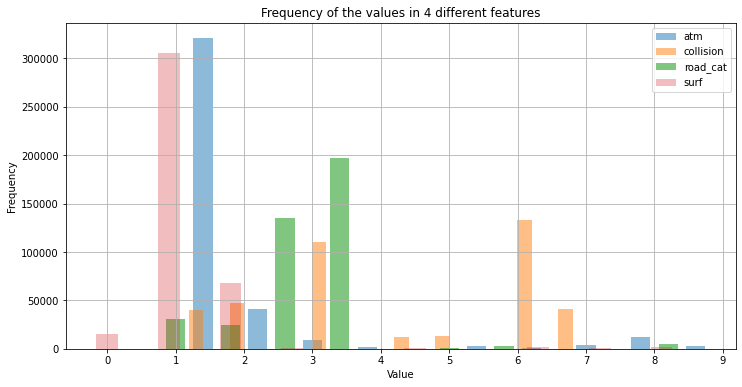

In [174]:
df['atm'].hist(alpha=0.5, rwidth=0.35, align='mid', figsize=(12,6), label='atm')
df['col'].hist(alpha=0.5, rwidth=0.35, align='mid', label='collision')
df['road_cat'].hist(alpha=0.6, rwidth=0.35, align='left', label='road_cat')
df['surf'].hist(alpha=0.3,rwidth=0.35, align='left', label='surf')
plt.title('Frequency of the values in 4 different features', size=12)
plt.xticks(range(10))
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

In [175]:
df['atm'].fillna(9, inplace=True)
df['col'].fillna(6, inplace=True)
df['road_cat'].fillna(9, inplace=True)
df['surf'].fillna(9, inplace=True)
df['surf'].replace(0,9, inplace=True)
df.surf.value_counts()

1.0    305265
2.0     67858
9.0     18234
7.0      2189
8.0       937
5.0       931
3.0       430
6.0       234
4.0       166
Name: surf, dtype: int64

In [176]:
df[['traf_reg', 'num_lanes','res_lane', 'long_prof', 'shape', 'infra', 'situation']].describe()

,traf_reg,num_lanes,res_lane,long_prof,shape,infra,situation
count,395516.000000,395142.000000,394896.000000,395266.000000,395246.000000,395150.000000,395306.000000
mean,1.836482,1.991638,0.131146,1.130952,1.194616,0.430120,1.147094
std,0.739864,1.260452,0.554474,0.623801,0.730355,1.337904,0.732933
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
50%,2.000000,2.000000,0.000000,1.000000,1.000000,0.000000,1.000000
75%,2.000000,2.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,4.000000,13.000000,3.000000,4.000000,4.000000,7.000000,5.000000


In [177]:
df.drop(['infra', 'res_lane'], axis=1, inplace=True)

In [178]:
df['num_lanes'].value_counts()

2.0     217824
0.0      50582
1.0      49846
4.0      34465
3.0      30352
6.0       6681
5.0       3605
8.0       1135
7.0        387
10.0       148
9.0         69
12.0        19
11.0        18
13.0        11
Name: num_lanes, dtype: int64

In [179]:
df.num_lanes.fillna(0, inplace=True)
df['num_lanes'] = df['num_lanes'].apply(lambda x: 2 if x>6 or x==0 else x)
df.num_lanes.value_counts()

2.0    271295
1.0     49846
4.0     34465
3.0     30352
6.0      6681
5.0      3605
Name: num_lanes, dtype: int64

In [180]:
df.dropna(inplace=True)

In [163]:
df.isna().sum()

ID           0
time         0
lum          0
agg          0
int          0
atm          0
col          0
dep          0
road_cat     0
traf_reg     0
num_lanes    0
long_prof    0
shape        0
surf         0
situation    0
school       0
crit_age     0
ped          0
dead_age     0
num_us       0
sev          0
date         0
weekend      0
holiday      0
dtype: int64

In [185]:
df['dep'].describe()

count    298505.000000
mean          5.308099
std           2.936491
min           0.000000
25%           3.000000
50%           6.000000
75%           8.000000
max           9.000000
Name: dep, dtype: float64

In [184]:
df["dep"] = df["dep"].div(10).apply(np.floor)
df["dep"] = df["dep"].astype(int)

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298505 entries, 0 to 299718
Data columns (total 24 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   ID         298505 non-null  int64  
 1   time       298505 non-null  float64
 2   lum        298505 non-null  int64  
 3   agg        298505 non-null  int64  
 4   int        298505 non-null  int64  
 5   atm        298505 non-null  float64
 6   col        298505 non-null  float64
 7   dep        298505 non-null  int64  
 8   road_cat   298505 non-null  int64  
 9   traf_reg   298505 non-null  float64
 10  num_lanes  298505 non-null  float64
 11  long_prof  298505 non-null  float64
 12  shape      298505 non-null  float64
 13  surf       298505 non-null  float64
 14  situation  298505 non-null  float64
 15  school     298505 non-null  float64
 16  crit_age   298505 non-null  float64
 17  ped        298505 non-null  float64
 18  dead_age   298505 non-null  float64
 19  num_us     298505 non-n

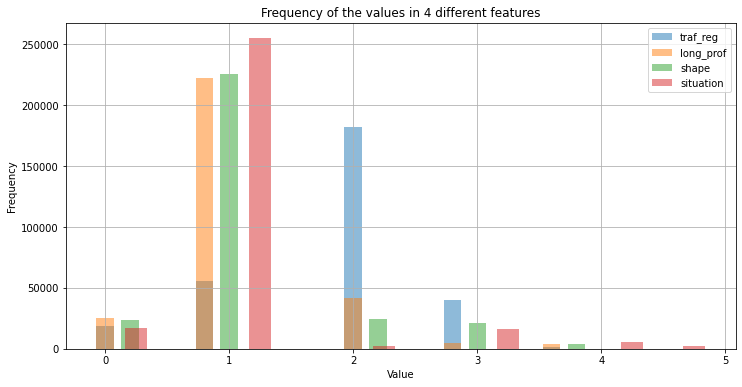

In [187]:
df['traf_reg'].hist(alpha=0.5, rwidth=0.35, align='left', figsize=(12,6), label='traf_reg')
df['long_prof'].hist(alpha=0.5,rwidth=0.35, align='left', label='long_prof')
df['shape'].hist(alpha=0.5,rwidth=0.35, align='mid', label='shape')
df['situation'].hist(alpha=0.5,rwidth=0.35, align='mid', label='situation')
plt.title('Frequency of the values in 4 different features', size=12)
plt.xticks(range(6))
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

In [188]:
df['traf_reg'].fillna(0, inplace=True)
df['traf_reg'] = df['traf_reg'].replace(0,2)

df['long_prof'].fillna(0, inplace=True)
df['long_prof'] = df['long_prof'].replace(0,1)

df['shape'].fillna(0, inplace=True)
df['shape'] = df['shape'].replace(0,1)

df['situation'].fillna(0, inplace=True)
df['situation'] = df['situation'].replace(0,1)

Text(0.5, 1.0, 'School feature values')

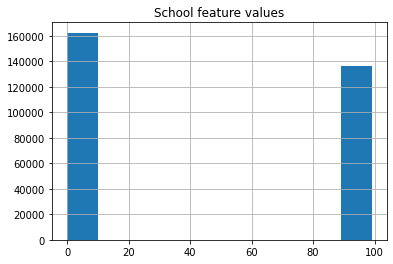

In [189]:
df.school.describe(), df.school.hist()
plt.title('School feature values')

In [190]:
df.school.fillna(0, inplace=True)
df['school'] = df.school.apply(lambda x:1 if x>0 else 0)

In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298505 entries, 0 to 299718
Data columns (total 24 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   ID         298505 non-null  int64  
 1   time       298505 non-null  float64
 2   lum        298505 non-null  int64  
 3   agg        298505 non-null  int64  
 4   int        298505 non-null  int64  
 5   atm        298505 non-null  float64
 6   col        298505 non-null  float64
 7   dep        298505 non-null  int64  
 8   road_cat   298505 non-null  int64  
 9   traf_reg   298505 non-null  float64
 10  num_lanes  298505 non-null  float64
 11  long_prof  298505 non-null  float64
 12  shape      298505 non-null  float64
 13  surf       298505 non-null  float64
 14  situation  298505 non-null  float64
 15  school     298505 non-null  int64  
 16  crit_age   298505 non-null  float64
 17  ped        298505 non-null  float64
 18  dead_age   298505 non-null  float64
 19  num_us     298505 non-n

## 3.EDA
This section is aiming to gain a better understanding of the data summarizing the main characteristics as well as uncovering importan relationships of the features with the severity of an accident.

**Target: Severity**
The data is almost evenly distributed on both high and low severity accidents.

Accidents classified in each level of severity:
0.0    167575
1.0    130930
Name: sev, dtype: int64


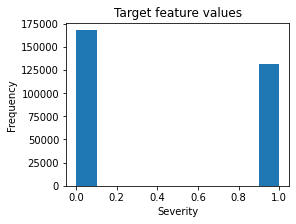

In [192]:
df.sev.plot.hist(figsize=(4,3))
plt.title('Target feature values')
plt.xlabel('Severity')
plt.ylabel('Frequency')
print('Accidents classified in each level of severity:')
print(df.sev.value_counts())

# Seasonality
The number of traffic accidents decreased over the years from 2005 to 2013, after which the trend became stable.\ Analyszing the yearly trend there is a seasonal pattern where the number of accidents increase around March and then again in September.\ Regarding the day of the week there is not a significant difference between them. There is a steady trend during the week with more accidents on friday, and sunday is the day with less accident of all.\ Lastly analyzing the accidents per hour, there are clearly two spikes, one at 8am, the time people go to work and another one between 5 and 6pm, time when people return home. The number of accidents decreases between these two spikes, nothing unusual but it proves there is a pattern here.

In [193]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
date = df[['ID','sev', 'date']]
date.date

0        2016-02-01
1        2016-03-16
2        2016-07-13
3        2016-08-15
4        2016-12-23
            ...    
299714   2011-09-02
299715   2011-09-03
299716   2011-10-05
299717   2011-11-06
299718   2011-11-27
Name: date, Length: 298505, dtype: datetime64[ns]

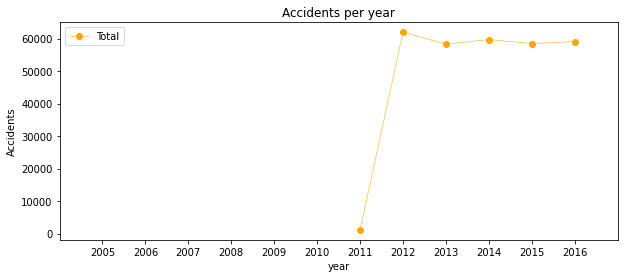

In [195]:
yearly = date[['year', 'ID']].groupby('year').count()
yearly['ID'].plot.line(figsize=(10,4), marker='o', linewidth=0.5, color='orange', label='Total')
plt.title('Accidents per year')
plt.xticks(range(2005,2017))
plt.xlim(2004,2017)
plt.ylabel('Accidents')
plt.legend()

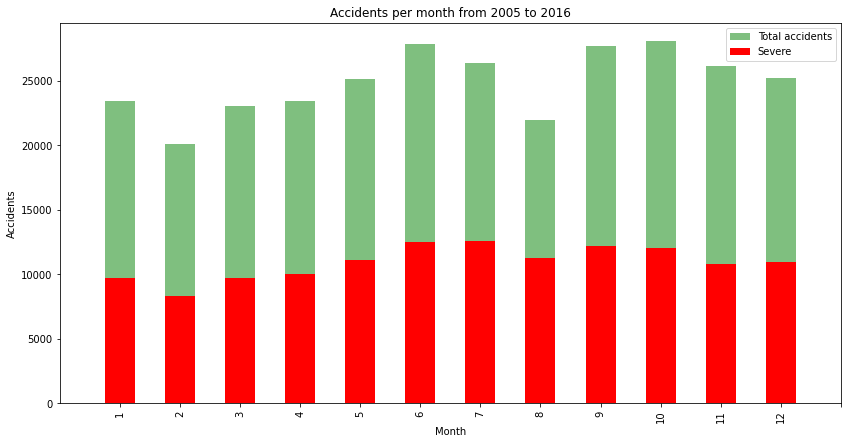

In [196]:
#By month

monthly = date[['month', 'ID']].groupby(['month']).count()
monthly['high_sev'] = high_sev[['month', 'ID']].groupby(['month']).count()


monthly['ID'].plot.bar(figsize=(14,7), alpha=0.5, color='g', label='Total accidents')
monthly['high_sev'].plot.bar(color='r', label='Severe')

plt.title('Accidents per month from 2005 to 2016')
plt.xticks(range(13))
plt.xlim(-1,12)
# plt.ylim(50000,85000)
plt.xlabel('Month')
plt.ylabel('Accidents')
plt.legend()

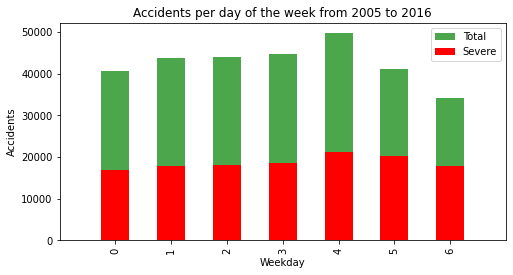

In [197]:

#By day of the week

weekday = date[['weekday', 'ID']].groupby('weekday').count()
weekday['high_sev'] = high_sev[['weekday', 'ID']].groupby(['weekday']).count()
weekday['ID'].plot.bar(figsize=(8,4), alpha=0.7, color='g', label='Total')
weekday['high_sev'].plot.bar(color='r', label='Severe')

plt.title('Accidents per day of the week from 2005 to 2016')
plt.xticks(range(7))
plt.xlim(-1,7)
# plt.ylim(75000,150000)
plt.xlabel('Weekday')
plt.ylabel('Accidents')
plt.legend()

298505

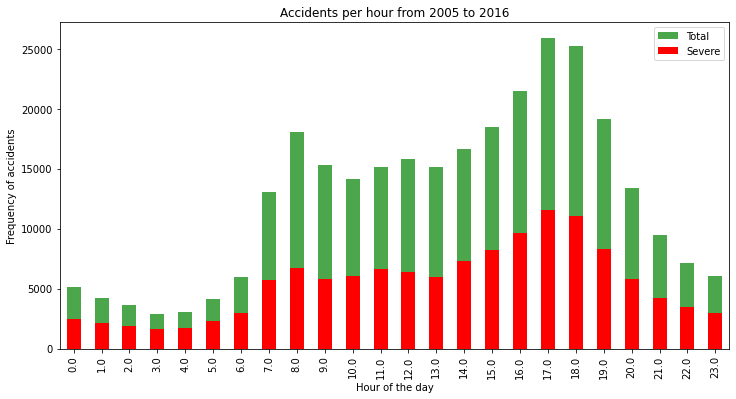

In [198]:

#By hour of the day

hourly = df[['ID', 'time']].groupby('time').count()
hourly['high_sev'] = df[df.sev==1][['ID', 'time']].groupby('time').count()
hourly['ID'].plot.bar(figsize=(12,6), alpha=0.7, color='g', label='Total')
hourly['high_sev'].plot.bar(color='r', label='Severe')
plt.xticks(range(24))
plt.title('Accidents per hour from 2005 to 2016')
plt.xlabel('Hour of the day')
plt.ylabel('Frequency of accidents')
plt.legend()
# df.time.value_counts()
# hourly.ID.value_counts()
hourly['ID'].sum()

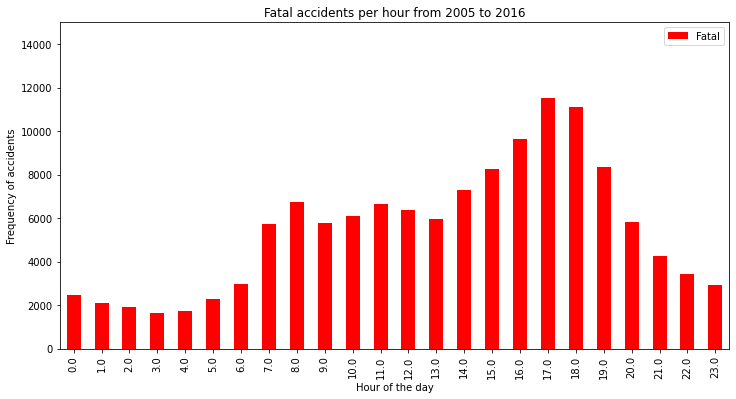

In [199]:

#Zoom in fatal accidents by hour of the day

hourly['high_sev'].plot.bar(figsize=(12,6),color='r', label='Fatal')
plt.xticks(range(24))
plt.ylim((0,15000))
plt.title('Fatal accidents per hour from 2005 to 2016')
plt.xlabel('Hour of the day')
plt.ylabel('Frequency of accidents')
plt.legend()

Same as for the monthly and weekly trends, zooming on the amount of highly severe accidents by hour of the day we have quite a simliar shape as for the total amount of accidents. One aspect to highlight from the hourly trend is that the proportion of severe accidents from noon to morning is higher.

In [200]:
noon_morn_severe = hourly.high_sev.loc[0:6].sum()+hourly.high_sev.loc[21:23].sum()
day_severe = hourly.high_sev.loc[7:20].sum()
noon_morn = hourly.ID.loc[0:6].sum()+hourly.ID.loc[21:23].sum()
day = hourly.ID.loc[7:20].sum()
noon_morn_prop = (noon_morn_severe/noon_morn)*100
day_prop = (day_severe/day)*100
print('The percentage of severe accidents from 9pm to 6am is {0:0.2f}% of the total amount of accidents ocurring between this hours,\
     while the percentage of deathly accidents from 7am to 8pm is {1:2.2f}%.'.format(noon_morn_prop.round(2), day_prop))

The percentage of severe accidents from 9pm to 6am is 49.87% of the total amount of accidents ocurring between this hours,     while the percentage of deathly accidents from 7am to 8pm is 42.61%.


In [201]:
df['month'] = df.date.dt.month
df['day'] = df.date.dt.day

In [202]:
df.day.value_counts

<bound method IndexOpsMixin.value_counts of 0          1
1         16
2         13
3         15
4         23
          ..
299714     2
299715     3
299716     5
299717     6
299718    27
Name: day, Length: 298505, dtype: int64>

**Correlation**

In [203]:
df[['sev','lum', 'agg', 'int', 'atm',
    'col', 'dep', 'road_cat', 'traf_reg',
    'num_lanes', 'long_prof', 'shape', 'surf', 
    'situation', 'school', 'crit_age','dead_age', 'ped',
    'num_us', 'weekend', 'holiday', 'month', 'day']].corr()['sev'].sort_values(ascending=False)

sev          1.000000
shape        0.145828
situation    0.127160
weekend      0.080442
traf_reg     0.076166
long_prof    0.062362
dead_age     0.056182
atm          0.049897
school       0.036776
col          0.031455
holiday      0.023033
num_us       0.021974
month        0.011373
day          0.001660
lum         -0.007801
ped         -0.008030
surf        -0.009768
crit_age    -0.040181
int         -0.079943
road_cat    -0.096245
num_lanes   -0.102613
dep         -0.120050
agg         -0.277293
Name: sev, dtype: float64

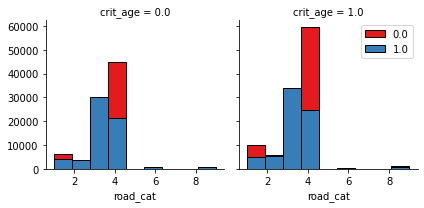

In [204]:
bins = np.linspace(df.atm.min(), df.atm.max(), 10)
g = sns.FacetGrid(df, col="crit_age", hue="sev", palette="Set1", col_wrap=2)
g.map(plt.hist,'road_cat', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

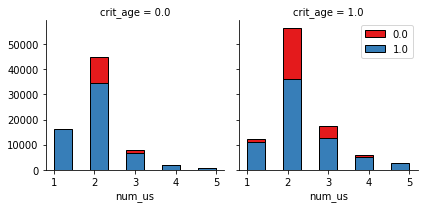

In [205]:
bins = np.linspace(df.lum.min(), df.lum.max(), 10)
g = sns.FacetGrid(df, col="crit_age", hue="sev", palette="Set1", col_wrap=2)
g.map(plt.hist, 'num_us', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

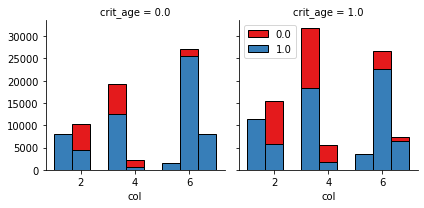

In [206]:
bins = np.linspace(df.col.min(), df.col.max(), 10)
g = sns.FacetGrid(df, col="crit_age", hue="sev", palette="Set1", col_wrap=2)
g.map(plt.hist, 'col', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

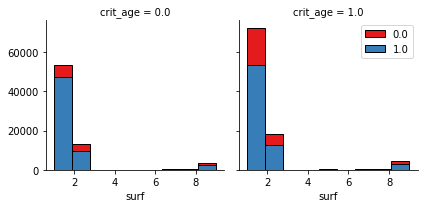

In [207]:
bins = np.linspace(df.surf.min(), df.surf.max(), 10)
g = sns.FacetGrid(df, col="crit_age", hue="sev", palette="Set1", col_wrap=2)
g.map(plt.hist, 'surf', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

Text(0.5, 0, 'Severity')

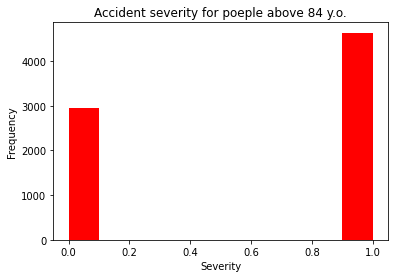

In [208]:
df['sev'][df['dead_age']==1].plot.hist(color='r')
# plt.xlabel('Hour of the day')
plt.title('Accident severity for poeple above 84 y.o.')
plt.xlabel('Severity')

Text(0.5, 0, 'Severity')

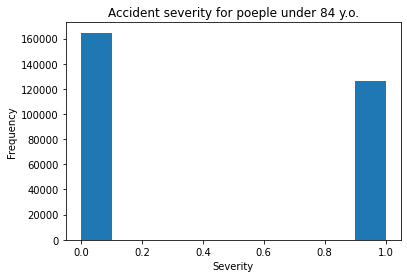

In [209]:
df['sev'][df['dead_age']==0].plot.hist()
plt.title('Accident severity for poeple under 84 y.o.')
plt.xlabel('Severity')

From the correlation of each feature individualy with the severity, there is not a significant correlation in any of the cases. However, from the plots above we can say that gathering together some combinations of the features, these combinations could be classified in the different severity categories.

# **4. Data Preparation**


Step right before the model development. The data preparation consists on the normalization and the train/test/validation split. Also the models I will use to predict the severity of an accident do not handel categorical variables so date some features will be dropped for now.

In [210]:
df.drop(['ID', 'date'], axis=1, inplace=True)

In [211]:

#Some feature's values range from 1 to 9 while others just go either for 1 or 2, 
#Normalizing the data makes that any feature has more influence in the result than others.

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# X = df.drop('sev', axis=1)
# X = StandardScaler().fit(X).transform(X)

xtrain, xtest, ytrain, ytest = train_test_split(df.drop('sev', axis=1), df['sev'], test_size=0.2, random_state=8)
xtrain, xval, ytrain, yval = train_test_split(xtrain, ytrain, test_size=0.2) 


print('Size of training set:', xtrain.shape[0],'\n'
      'Size of test set:',xtest.shape[0],'\n'
      'Size of evaluation set:', xval.shape[0])

Size of training set: 191043 
Size of test set: 59701 
Size of evaluation set: 47761


# **5. Model Develoment**

In [212]:

#importing models 

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

#Evaluation Metrics
import time
from sklearn.metrics import accuracy_score, log_loss, jaccard_similarity_score, classification_report
from sklearn.metrics import precision_score, recall_score, roc_curve

### **1. Decision Tree**

In [213]:
type(xtrain)

pandas.core.frame.DataFrame

In [214]:
t0=time.time()
tree = DecisionTreeClassifier(criterion='entropy')
tree.fit(xtrain,ytrain)
print('Time taken :' , time.time()-t0)
yhat = tree.predict(xval)
score_tree = accuracy_score(yval,yhat)
print('Accuracy :',score_tree)

Time taken : 1.9909393787384033
Accuracy : 0.6262012939427566


### **1.1. Random Forest**
  To go a bit further I will develop a Random Forest model. A random forest fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The number of decision trees is specified with the n_estimators parameter.\ An upside of this algorithm is its feature_importances_ atribut, it returns the impurity based feature importance.

In [215]:
#RF 1

t0=time.time()
model_rf = RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=0, n_jobs=-1)
model_rf.fit(xtrain,ytrain)
print('Time taken :' , time.time()-t0)
yhat = model_rf.predict(xval)
score_rf = accuracy_score(yval,yhat)
print('Accuracy :',score_rf)

Time taken : 28.46190118789673
Accuracy : 0.7200435501769226


In [216]:
importances = pd.DataFrame({'feature':df.drop('sev', axis=1).columns,'importance':np.round(model_rf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
day,0.150
time,0.126
month,0.110
dep,0.091
road_cat,0.059
col,0.051
num_us,0.047
num_lanes,0.040
agg,0.036



The goal will now be to improve the accuracy and running time of the model thanks to feature selection and hyperparameter tuning. So I will drop the 10 least important features and run the model again.

In [217]:
xtrain = pd.DataFrame(xtrain)
xtrain.drop(['dead_age', 'holiday', 'ped', 'situation', 'weekend', 'school', 'shape', 'crit_age', 'surf', 'long_prof','lum','atm'], axis=1, inplace=True)
xval.drop(['dead_age', 'holiday', 'ped', 'situation', 'weekend', 'school', 'shape', 'crit_age', 'surf', 'long_prof', 'lum', 'atm'], axis=1, inplace=True)
xtest.drop(['dead_age', 'holiday', 'ped', 'situation', 'weekend', 'school', 'shape', 'crit_age','surf', 'long_prof', 'lum', 'atm'], axis=1, inplace=True)

In [218]:
#RF 2:
#number of features reduced from 23 to 13

t0=time.time()
model_rf = RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=0, n_jobs=-1)
model_rf.fit(xtrain,ytrain)
print('Time taken :' , time.time()-t0)
yhat = model_rf.predict(xval)
score_rf = accuracy_score(yval,yhat)
print('Accuracy :',score_rf)

Time taken : 25.5152428150177
Accuracy : 0.6970750193672661


In [219]:
#RF 3:

#number of decision trees reduced from 100 to 50
#Limiting the number of features to look at when creating the next split to 5
#Limiting the max depth of the tree to 10


t0=time.time()
model_rf = RandomForestClassifier(n_estimators=50, max_features=5, max_depth =10 ,criterion='entropy',random_state=0, n_jobs=-1)
model_rf.fit(xtrain,ytrain)
print('Time taken :' , time.time()-t0)
yhat = model_rf.predict(xval)
score_rf = accuracy_score(yval,yhat)
print('Accuracy :',score_rf)

Time taken : 7.858509302139282
Accuracy : 0.7186197943929147


In [220]:
#RF 4:

#number of decision trees reduced from 50 to 10
#Limiting the number of features to look at when creating the next split to 8
#Limiting the max depth of the tree to 12


t0=time.time()
model_rf = RandomForestClassifier(n_estimators=10, max_features=8, max_depth =12,criterion='entropy',random_state=0, n_jobs=-1)
model_rf.fit(xtrain,ytrain)
print('Time taken :' , time.time()-t0)
yhat = model_rf.predict(xval)
score_rf = accuracy_score(yval,yhat)
print('Accuracy :',score_rf)

Time taken : 2.643932342529297
Accuracy : 0.7182847930319717


In [222]:
#Evaluation

t0=time.time()
model_rf = RandomForestClassifier(n_estimators=10, max_features=8, max_depth =12,criterion='entropy',random_state=0, n_jobs=-1)
model_rf.fit(xtrain,ytrain)
t_rf = time.time()-t0
print('Time taken :' , t_rf)
yhat_rf = model_rf.predict(xtest)
jaccard_rf = jaccard_similarity_score(ytest,yhat_rf)
c_rf = classification_report(ytest,yhat_rf)
prec_rf = precision_score(ytest, yhat_rf)
rec_rf = recall_score(ytest, yhat_rf)
print('Jaccard :',jaccard_rf,'\n',
     c_rf)

Time taken : 2.640620470046997
Jaccard : 0.7150466491348554 
               precision    recall  f1-score   support

         0.0       0.71      0.84      0.77     33685
         1.0       0.73      0.56      0.63     26016

    accuracy                           0.72     59701
   macro avg       0.72      0.70      0.70     59701
weighted avg       0.72      0.72      0.71     59701




### **2. LogisticRegression**
First I'll look for the best regularization coeficient then I creat the model.

In [223]:
acc=np.zeros(6)
i=0
for c in [0.5, 0.1, 0.01, 0.001, 10, 100]:
    lr = LogisticRegression(C=c, solver='liblinear').fit(xtrain, ytrain)
    yhat = lr.predict(xval)
    acc[i] = accuracy_score(yval,yhat)
    i+=1
acc

array([0.66470551, 0.66468458, 0.66541739, 0.66604552, 0.6646427 ,
       0.66466364])

In [224]:
#Evaluation

t0=time.time()
lr = LogisticRegression(C=0.001, solver='liblinear').fit(xtrain, ytrain)
t_lr = time.time()-t0
print('Time taken :' , t_lr)
yhat = lr.predict(xtest)
jaccard_lr = jaccard_similarity_score(ytest,yhat)
c_lr = classification_report(ytest,yhat)
prec_lr = precision_score(ytest, yhat)
rec_lr = recall_score(ytest, yhat)
print('Jaccard :',jaccard_lr,'\n',
     c_lr)

Time taken : 1.3799426555633545
Jaccard : 0.660759451265473 
               precision    recall  f1-score   support

         0.0       0.66      0.82      0.73     33685
         1.0       0.66      0.46      0.54     26016

    accuracy                           0.66     59701
   macro avg       0.66      0.64      0.64     59701
weighted avg       0.66      0.66      0.65     59701



### **3. KNN**
Firstly I will search for the best performing K and then I will fit the model with the training set and evaluat it with the test set.
Due to the size of the dataset, I will reduce the training and evaluation sets to the half of them in the process of searching for the optim K.

In [225]:
tt = xtrain.shape[0]
tv = xval.shape[0]
xtrain[int(tt*0.5):].shape[0], xval[int(tv*0.5):].shape[0]

(95522, 23881)

In [226]:
ks = 17
mean_acc = np.zeros(ks-1)
std_acc = np.zeros(ks-1)

for n in range(1,ks):
    neigh = KNeighborsClassifier(n_neighbors = n).fit(xtrain[int(tt*0.5):],ytrain[int(tt*0.5):])
    yhat = neigh.predict(xval[int(tv*0.5):])
    mean_acc[n-1] = accuracy_score(yval[int(tv*0.5):],yhat)
    std_acc[n-1] = np.std(yhat==yval[int(tv*0.5):])/np.sqrt(yhat.shape[0])
print('Best performing K is '+ str(mean_acc.argmax()+1) + ' with an accuracy of ' +str(mean_acc.max()))

Best performing K is 14 with an accuracy of 0.6453666094384657


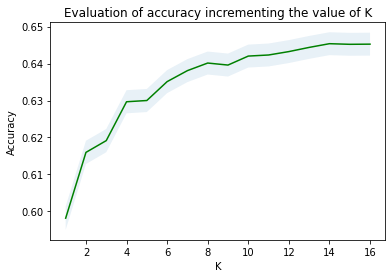

In [227]:
plt.plot(range(1,ks),mean_acc,'g')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Evaluation of accuracy incrementing the value of K')
plt.fill_between(range(1,ks),mean_acc-1*std_acc,mean_acc+1*std_acc, alpha=0.1)

In [228]:

#Evaluation

t0=time.time()
model_knn = KNeighborsClassifier(n_neighbors = 16, n_jobs=-1)
model_knn.fit(xtrain,ytrain)
t_knn = time.time()-t0
print('Time taken :' , t_knn)
yhat = model_knn.predict(xtest)
jaccard_knn = jaccard_similarity_score(ytest,yhat)
c_knn = classification_report(ytest,yhat)
prec_knn = precision_score(ytest, yhat)
rec_knn = recall_score(ytest, yhat)
print('Jaccard :',jaccard_knn,'\n',
     c_knn)

Time taken : 22.951329946517944
Jaccard : 0.6609269526473593 
               precision    recall  f1-score   support

         0.0       0.67      0.79      0.73     33685
         1.0       0.65      0.49      0.56     26016

    accuracy                           0.66     59701
   macro avg       0.66      0.64      0.64     59701
weighted avg       0.66      0.66      0.65     59701



### **4. SVM**

In [229]:
size = [1000,5000,10000,12000,15000,20000,30000,40000,50000,75000,100000]
acc = []
t = []
for s in size:
    t0=time.time()
    sv = SVC().fit(xtrain[:s],ytrain[:s])
    t.append(time.time()-t0)
    yhat = sv.predict(xval[:s])
    acc.append(jaccard_similarity_score(yval[:s],yhat))

In [230]:
performance = pd.DataFrame({'acc':acc, 'time':t}, index=size)
performance

,acc,time
1000,0.592000,0.053330
5000,0.665600,1.174052
10000,0.659000,4.820385
12000,0.658000,6.858568
15000,0.661067,10.808147
20000,0.660750,18.869860
30000,0.665000,42.806006
40000,0.662800,76.326126
50000,0.663617,119.146204
75000,0.666527,278.697635


Text(0.5, 1.0, 'Time(s)')

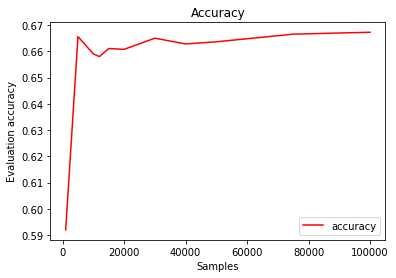

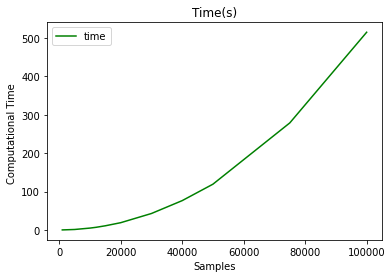

In [231]:
performance.plot(y='acc', color='r', label='accuracy')
plt.xlabel('Samples')
plt.ylabel('Evaluation accuracy')
plt.title('Accuracy')
performance.plot(y='time', color='green', label='time')
plt.xlabel('Samples')
plt.ylabel('Computational Time ')
plt.title('Time(s)')

In [232]:
#Evaluation

s=75000
t0=time.time()
sv = SVC().fit(xtrain[:s],ytrain[:s])
t_svm = time.time()-t0
print('Time taken :' , t_svm)
yhat = sv.predict(xtest[:s])
jaccard_svm = jaccard_similarity_score(ytest[:s],yhat)
c_svm = classification_report(ytest[:s],yhat)
prec_svm = precision_score(ytest[:s], yhat)
rec_svm = recall_score(ytest[:s], yhat)
print('Jaccard :',jaccard_lr,'\n',
     c_lr)

Time taken : 273.7080523967743
Jaccard : 0.660759451265473 
               precision    recall  f1-score   support

         0.0       0.66      0.82      0.73     33685
         1.0       0.66      0.46      0.54     26016

    accuracy                           0.66     59701
   macro avg       0.66      0.64      0.64     59701
weighted avg       0.66      0.66      0.65     59701




# **7. Results**

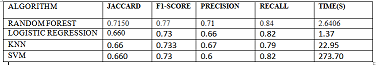


For this specific problem precision means the % of predicted severe accidents that were truly severe. The recall instead, is the % of truly severe accidents that were properly predicted. For this specific problem, the recall is more important than the precision as a high recall will favor that all required resources will be equipped up to the severity of the accident.\ In this case, the recall is more important than the precision as a high recall will favor that all required resources will be equipped up to the severity of the accident. The logistic regression, KNN, and SVM models have similar accuracy, however the computational time from the regression is far better than the other two models. With no doubt the Random Forest is the best model, in the same time as the log. res. it improves the accuracy from 0.66 to 0.72 and the recall from 0.45 to 0.59.

In [233]:
print('Jaccard:',jaccard_rf,'Precision:',prec_rf,'Recall:',rec_rf)
print('Jaccard:',jaccard_lr,'Precision:',prec_lr,'Recall:',rec_lr)
print('Jaccard:',jaccard_knn,'Precision:',prec_knn,'Recall:',rec_knn)
print('Jaccard:',jaccard_svm,'Precision:',prec_svm,'Recall:',rec_svm)

Jaccard: 0.7150466491348554 Precision: 0.725867951033514 Recall: 0.556119311193112
Jaccard: 0.660759451265473 Precision: 0.660056657223796 Recall: 0.45675738007380073
Jaccard: 0.6609269526473593 Precision: 0.6473531063351882 Recall: 0.4874308118081181
Jaccard: 0.6616639587276595 Precision: 0.6631880154856085 Recall: 0.45433579335793356


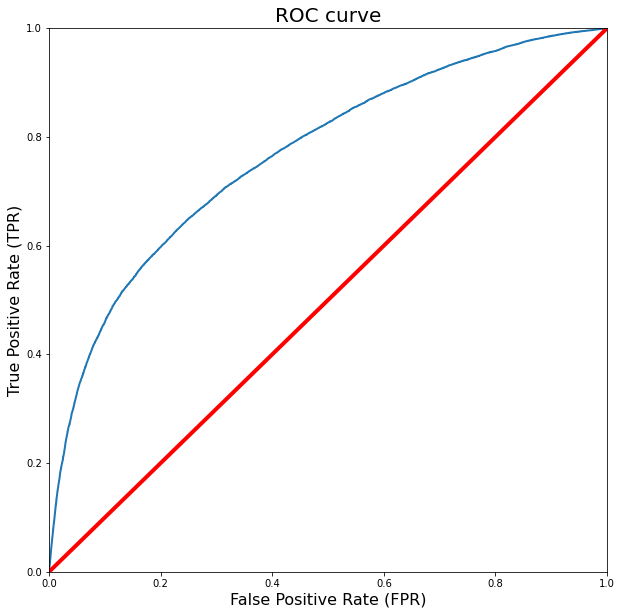

In [234]:
#ROC curve.

yscores = model_rf.predict_proba(xtest)

false_positive_rate, true_positive_rate, thresholds = roc_curve(ytest.values, yscores[:,1])

def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label='a')
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(10, 10))
plt.title('ROC curve', fontsize=20)
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()